## 拿到許多關於乘客的資訊像是乘客的性別、姓名、出發港口、住的艙等、房間號碼、年齡、兄弟姊妹＋老婆丈夫數量(Sibsp)、父母小孩的數量(parch)、票的費用、票的號碼這些去預估這個乘客是否會在鐵達尼號沈船的意外中生存下來。



## Goal
### It is your job to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

## Training set and Test set

### The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

### The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.



In [221]:
# Load Library
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [222]:
# Load Data
train = pd.read_csv('/Users/DylanC/Desktop/Kaggle/Titanic_survival/train.csv')
test = pd.read_csv('/Users/DylanC/Desktop/Kaggle/Titanic_survival/test.csv')
submit = pd.read_csv('/Users/DylanC/Desktop/Kaggle/Titanic_survival/gender_submission.csv')

In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 使用info()函式觀察train以及test資料是否有空值，發現train的Age,Cabin,Embark有空值以及Test的Age, Fare, cabin有空值的情況，之後我們要想辦法來補這些空值。通常比賽能夠準確預測的關鍵都是在如何補空值。

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [225]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 使用describe來觀察train以及test的資料分布

In [226]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 接下來由於要對整體資料做一些觀察，因此先將資料做合併

### Combine Train and Test Data

In [228]:
data = train.append(test) #純粹在train資料後面加上test資料
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 由於使用append合併之後，會造成index重複問題。因此要將index重新設定

In [229]:
# inplace=True: modify the DataFrame rather than creating a new one.
# drop=True代表不把舊的index變成新的column，而是把它drop掉並重新用數字排列index
data.reset_index(inplace=True, drop=True) 

In [230]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 資料分析Data Analysis

### 接下來要對資料開始做一些觀察以及分析。首先分析生存以及死亡的比例是否有相當大的落差，發現大概死亡的比例是6成、生存的比例大概是4成



/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

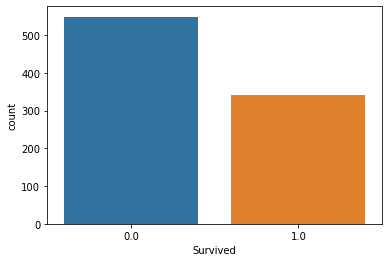

In [231]:
sns.countplot(data['Survived'])

### 觀察 艙等和生存率的關係，可以發現在1艙等的生存率最高、再來是2艙等、最後是3艙等的

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

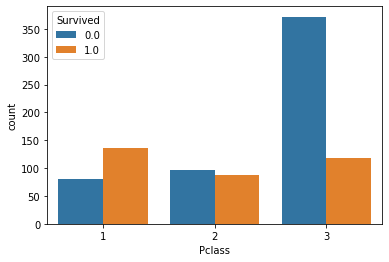

In [232]:
sns.countplot(data['Pclass'], hue=data['Survived'])

### 再來是觀察 性別跟生存率的關係，發現女生生存率是男生的好幾倍。或許是像在電影裡頭一樣，在逃難的時候先讓女生以及小孩先搭船

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

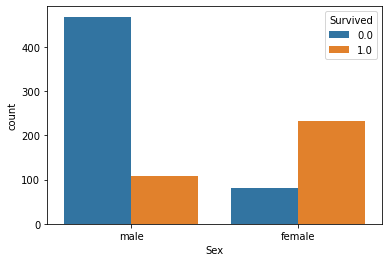

In [233]:
sns.countplot(data['Sex'], hue=data['Survived'])

### 出發港口跟生存率的差異，可以發現S港出發的都比較容易死亡，其原因可能是S城市出發的人買的票價都比較便宜

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

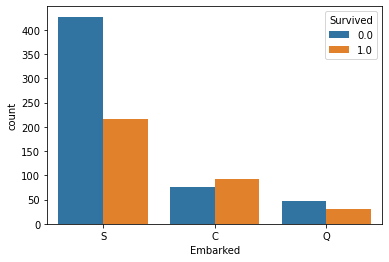

In [234]:
sns.countplot(data['Embarked'], hue=data['Survived'])

### 年齡跟生存率的關係，可以發現的確年齡小的存活比例高出許多

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

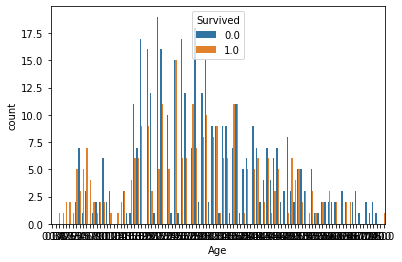

In [235]:
sns.countplot(data['Age'], hue=data['Survived']) #呈現上不清楚,因為不同的Age太多了

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


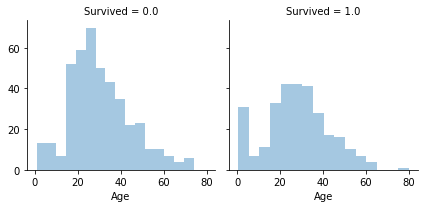

In [236]:
#FacetGrid 在数据集的不同子集上绘制相同绘图的多个实例。
#FacetGrid可以绘制最多三个维度：row，col和hue。前两者与所得轴数有明显的对应关系;将hue变量视为沿着深度轴的第三维，其中不同的级别用不同的颜色绘制。
a = sns.FacetGrid(data, col='Survived')   
a.map(sns.distplot, 'Age', kde=False)

### 票價跟生存率的關係，可以發現票價低的乘客死亡率高出許多

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


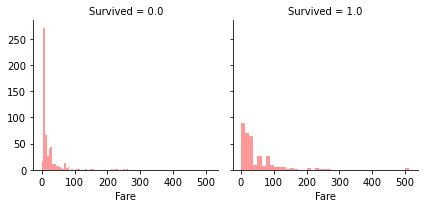

In [237]:
p = sns.FacetGrid(data, col='Survived')
p.map(sns.distplot, 'Fare', kde=False, color='r')

### 父母＋小孩的數量跟生存率的關係，發現沒有跟父母小孩一起來的生存率比起有跟父母小孩來的低

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


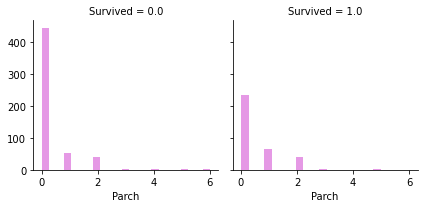

In [238]:
pc = sns.FacetGrid(data, col='Survived')
pc.map(sns.distplot, 'Parch', kde=False, color='m')

### 兄弟姊妹＋丈夫妻子的數量跟生存率的關係，發現沒有帶兄弟姊妹＋丈夫妻子一起來的生存率比起有跟兄弟姊妹＋丈夫妻子來的低

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


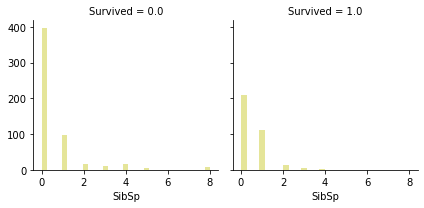

In [239]:
ss = sns.FacetGrid(data, col='Survived')
ss.map(sns.distplot, 'SibSp', kde=False, color='y')

### 經過一些反覆的測試把“父母＋小孩”加上“兄弟姊妹＋丈夫妻子”的數量變成一個新的欄位叫做家庭大小，在預測上會更為準確

In [240]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [241]:
data['Family_Size'] = data['Parch'] + data['SibSp']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


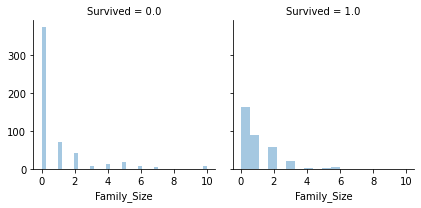

In [242]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

# 特徵工程Feature Engineering

### 接下來要來處理之前提到一些特徵，像是姓名這個欄位的資料就不能直接拿來用，但如果直接丟掉是一種資訊的浪費，因此我們稍微觀察一下名字這個欄位，可以發現名字的這個欄位有稱謂的資訊(Mr., Miss.) 我們可以利用這些資訊在未來更加提升預測的準確度

In [243]:
data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

### 將姓名的稱謂萃取出來，可以發現這些人的稱謂總共有’Mr’, ‘Mrs’, ‘Miss’, ‘Master’, ‘Don’, ‘Rev’, ‘Dr’, ‘Mme’, ‘Ms’, ‘Major’, ‘Lady’, ‘Sir’, ‘Mlle’, ‘Col’, ‘Capt’, ‘the Countess’, ‘Jonkheer’, ‘Dona’

In [244]:
data['Name'].str.split(', ', expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
1304,Spector,Mr. Woolf
1305,Oliva y Ocana,Dona. Fermina
1306,Saether,Mr. Simon Sivertsen
1307,Ware,Mr. Frederick


In [245]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1] #split後選第二個[1]

In [246]:
data['Title1'].head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Title1, dtype: object

In [247]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0] #split後選第ㄧ個[0]
data['Title1'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title1, dtype: object

In [248]:
data['Title1'].unique() #所有稱謂(不重複)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

### 將稱謂對性別、生存率、以及年齡做分析，發現一個有趣的地方，像是Master平均年齡只有五歲非常小，都是男生，並且生存機率有大約6成

In [249]:
# 找稱謂與性別之間的關係
pd.crosstab(data['Title1'], data['Sex'])

Sex,female,male
Title1,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [250]:
# crosstab用來計算分組頻率
pd.crosstab(data['Title1'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [251]:
pd.crosstab(data['Title1'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [252]:
data.groupby(['Title1']).size()

Title1
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
dtype: int64

In [253]:
data.groupby(['Title1'])['Age'].mean()  #data內，按Title1分組，其中column為‘Age’中，data的平均數

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [254]:
data.groupby(['Title1']).mean() #可看出Master的Survived的生存機率是0.575000(接近6成)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
Title1,,,,,,,,
Capt,746.000000,0.000000,1.000000,70.000000,1.000000,1.000000,71.000000,2.000000
Col,865.000000,0.500000,1.000000,54.000000,0.250000,0.000000,79.518750,0.250000
Don,31.000000,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800,0.000000
Dona,1306.000000,NaN,1.000000,39.000000,0.000000,0.000000,108.900000,0.000000
Dr,625.750000,0.428571,1.250000,43.571429,0.625000,0.125000,53.254688,0.750000
Jonkheer,823.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000
Lady,557.000000,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000,1.000000
Major,493.500000,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000,0.000000
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,36.008195,3.426230


In [255]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

### 若仔細觀察這些稱謂(’Mr’, ‘Mrs’, ‘Miss’, ‘Master’, ‘Don’, ‘Rev’, ‘Dr’, ‘Mme’, ‘Ms’, ‘Major’, ‘Lady’, ‘Sir’, ‘Mlle’, ‘Col’, ‘Capt’, ‘the Countess’, ‘Jonkheer’, ‘Dona’)會發現有些是稱謂的乘客非常少，如果我們只為了這些少數的乘客多了一個稱謂這樣對於機器學習的模型來說是一件不好的事情。因此我們把其中的稱謂做合併。



In [256]:
data.groupby('Title1')['Title1'].count() #可看出有些稱謂次數很少
# same way: data.groupby(['Title1']).size()

Title1
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
Name: Title1, dtype: int64

In [257]:
# replace中的第一個list都被第二個list給替換了
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt'
                        ,'Sir','Don','Dona'],                      
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs']) 

In [258]:
data['Title2'].unique()  # 現在稱謂只有以下這四種

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [259]:
data.groupby(['Title2'])['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [260]:
data.groupby(['Title2']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
Title2,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,36.008195,3.426230
Miss,617.928030,0.702703,2.337121,21.824366,0.655303,0.496212,42.566747,1.151515
Mr,658.936143,0.161710,2.348659,32.811056,0.286079,0.159642,25.385682,0.445722
Mrs,687.189055,0.796875,1.920398,36.971264,0.651741,0.815920,51.068470,1.467662


In [261]:
data.groupby(['Title2','Pclass'])['Age'].mean() # 該稱謂在1,2,3 class 的年齡平均

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [262]:
pd.crosstab(data['Title2'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [263]:
pd.crosstab(data['Title2'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


### 再來把Ticket的資訊取出前面英文的部分，因為相同的英文代碼可能代表的是房間的位置，後面的號碼沒有意義所以省略，如果只有號碼的票號就用X來表示

In [264]:
data.Ticket

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [265]:
# 將函數應用到DataFrame對象的某一行或列時，可使用apply()
data['Ticket_info'] = data['Ticket'].apply(lambda x: x.replace('.', '')    # 用replace把ticket資訊裡面有.的部分用空白給移除
                                          .replace('/', '').strip().split(' ')[0]    # 把ticket資訊裡面有/的部分用空白給移除
                                                                                     # strip()消除兩邊的whitespace
                                                                                     # split()按照whitespace分開，取第一個
                                           if not x.isdigit() else 'X')    # if 不是數字的話就沒事，不然是數字的話就全部為Ｘ

In [266]:
data['Ticket_info']

0            A5
1            PC
2        STONO2
3             X
4             X
         ...   
1304         A5
1305         PC
1306    SOTONOQ
1307          X
1308          X
Name: Ticket_info, Length: 1309, dtype: object

In [267]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [268]:
data.groupby(['Ticket_info']).size()

Ticket_info
A            1
A4          10
A5          28
AQ3          1
AQ4          1
AS           1
C            8
CA          68
CASOTON      1
FC           3
FCC          9
Fa           1
LINE         4
LP           1
PC          92
PP           4
PPP          2
SC           2
SCA3         1
SCA4         2
SCAH         5
SCOW         1
SCPARIS     14
SCParis      5
SOC          8
SOP          1
SOPP         7
SOTONO2      3
SOTONOQ     24
SP           1
STONO       14
STONO2       7
STONOQ       1
SWPP         2
WC          15
WEP          4
X          957
dtype: int64

<AxesSubplot:xlabel='Ticket_info', ylabel='Count'>

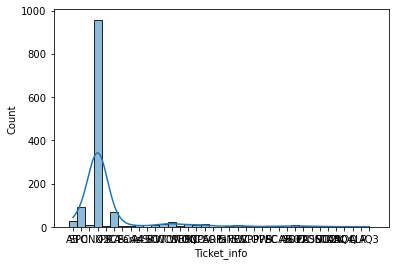

In [269]:
sns.histplot(data['Ticket_info'], kde=True)

In [270]:
data.groupby('Ticket_info')['Survived'].count()

Ticket_info
A            0
A4           7
A5          21
AQ3          0
AQ4          0
AS           1
C            5
CA          41
CASOTON      1
FC           1
FCC          5
Fa           1
LINE         4
LP           0
PC          60
PP           3
PPP          2
SC           1
SCA3         0
SCA4         1
SCAH         3
SCOW         1
SCPARIS      7
SCParis      4
SOC          6
SOP          1
SOPP         3
SOTONO2      2
SOTONOQ     15
SP           1
STONO       12
STONO2       6
STONOQ       0
SWPP         2
WC          10
WEP          3
X          661
Name: Survived, dtype: int64

### 由於登船港口(Embarked)只有遺漏少數，我們就直接補上出現次數最多的”S”，費用(Fare)也只有遺漏一筆，因此就直接補上平均值

### Missing Value-embarked、Fare、Age

In [271]:
data.groupby('Embarked')['Embarked'].count() #得知"S"最多

Embarked
C    270
Q    123
S    914
Name: Embarked, dtype: int64

In [272]:
data['Embarked'] = data['Embarked'].fillna('S')

In [273]:
data.info() # Embarked的空值補完了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [274]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [275]:
data.info() # Fare的空值補完了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


### 觀察Cabin的資料後，只取出最前面的英文字母，剩下的用NoCabin來表示

In [276]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [277]:
#str()把裡面的轉為string
# 如果不是空值insull(x)的話就執行 str(x)[0],否則執行 ‘NoCabin'
data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'NoCabin') 
data['Cabin'] 

0       NoCabin
1             C
2       NoCabin
3             C
4       NoCabin
         ...   
1304    NoCabin
1305          C
1306    NoCabin
1307    NoCabin
1308    NoCabin
Name: Cabin, Length: 1309, dtype: object

In [278]:
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

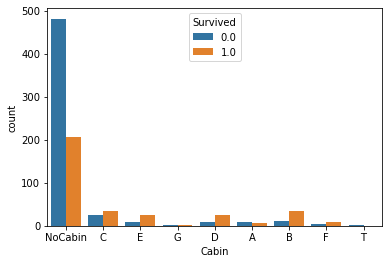

In [290]:
sns.countplot(data['Cabin'], hue=data['Survived'])

## 將類別資料category轉為整數

In [291]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [297]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
0,1,0.0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2,1,12,2,2
1,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,1,13,3,14
2,3,1.0,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2,0,9,1,31
3,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,1,13,3,36
4,5,0.0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2,0,12,2,36


## 使用Random Forest來推測年齡

In [317]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())<=(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())<=(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]  # 去除outlier之後: 去除小於平均數的4倍標準差後的資料
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])  # 預測年齡Age；x_train: remove_outlier[ageColumns], y_train:remove_outlier["Age"]

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

/Users/DylanC/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [319]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [325]:
dataTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
263,1,0.0,2,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,2,1,12,2,2
264,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,1,13,3,14
265,3,1.0,2,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,2,0,9,1,31
266,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,2,1,13,3,36
267,5,0.0,2,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,2,0,12,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,887,0.0,1,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,2,0,15,2,36
974,888,1.0,0,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,2,0,9,1,36
176,889,0.0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,10.579366,1,2,W./C. 6607,23.4500,7,2,3,9,1,34
975,890,1.0,0,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,0,12,2,36


In [326]:
dataTest

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title1,Title2,Ticket_info
977,892,NaN,2,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,7,1,0,12,2,36
978,893,NaN,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,7,2,1,13,3,36
979,894,NaN,1,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,7,1,0,12,2,36
980,895,NaN,2,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,7,2,0,12,2,36
981,896,NaN,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,7,2,2,13,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1305,NaN,2,"Spector, Mr. Woolf",1,32.182032,0,0,A.5. 3236,8.0500,7,2,0,12,2,2
1307,1306,NaN,0,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,2,0,0,3,3,14
1308,1307,NaN,2,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,7,2,0,12,2,28
261,1308,NaN,2,"Ware, Mr. Frederick",1,31.071805,0,0,359309,8.0500,7,2,0,12,2,36


In [1090]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [1091]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [1092]:
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.000000,2,7.2500,2,1,1,2,2,7
264,1.0,38.000000,0,71.2833,0,0,1,3,14,2
265,1.0,26.000000,2,7.9250,2,0,0,1,31,7
266,1.0,35.000000,2,53.1000,0,0,1,3,36,2
267,0.0,35.000000,2,8.0500,2,1,0,2,36,7
0,0.0,29.176796,1,8.4583,2,1,0,2,36,7
268,0.0,54.000000,2,51.8625,0,1,0,2,36,4
269,0.0,2.000000,2,21.0750,2,1,4,0,36,7
270,1.0,27.000000,2,11.1333,2,0,2,3,36,7
271,1.0,14.000000,0,30.0708,1,0,1,3,36,7


In [1093]:
dataTest

,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
977,34.500000,1,7.8292,2,1,0,2,36,7
978,47.000000,2,7.0000,2,0,1,3,36,7
979,62.000000,1,9.6875,1,1,0,2,36,7
980,27.000000,2,8.6625,2,1,0,2,36,7
981,22.000000,2,12.2875,2,0,2,3,36,7
982,14.000000,2,9.2250,2,1,0,2,36,7
983,30.000000,1,7.6292,2,0,0,1,36,7
984,26.000000,2,29.0000,1,1,2,2,36,7
985,18.000000,0,7.2292,2,0,0,3,36,7
986,21.000000,2,24.1500,2,1,2,2,1,7


## Model Training 
### 載入Random Forest來預測存活率

In [1094]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_) 
# 自助集大約平均會包含 63% 的原始數據
# 表示會有37%的數據集被浪費掉，沒有參與建模，其被稱為袋外數據(out of bag data;oob)
# 亦可以被用來作為集成算法的測試集使用
# 亦指在使用隨機森林時，我們可以不劃分測試集和訓練集，只需要用袋外數據來測試模型

0.8361


In [1095]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.265815
2,Fare,0.159245
6,Title2,0.148037
0,Age,0.144600
3,Pclass,0.089597
5,Family_Size,0.070688
8,Cabin,0.066579
7,Ticket_info,0.031865
1,Embarked,0.023574


In [1096]:
rf_res =  rf.predict(dataTest) #來預測datatest
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [1097]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
